<a href="https://colab.research.google.com/github/pchikode/Airlines_Analysis-using-Python-ML/blob/main/Copy_of_Airlines_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✈️ Flight Passenger Satisfaction Analysis

Analyze airline passenger data to uncover what drives satisfaction, how services and delays impact sentiment, and build a model to predict satisfaction.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train.csv')


In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(103594, 23)

In [ ]:
df['satisfaction']=df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    103594 no

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [ ]:
df['satisfaction'].value_counts(normalize=False)

,count
satisfaction,
0,58697
1,44897


## ❓ Q1: Does Type of Travel affect Satisfaction?

Text(0, 0.5, 'Average Satisfaction')

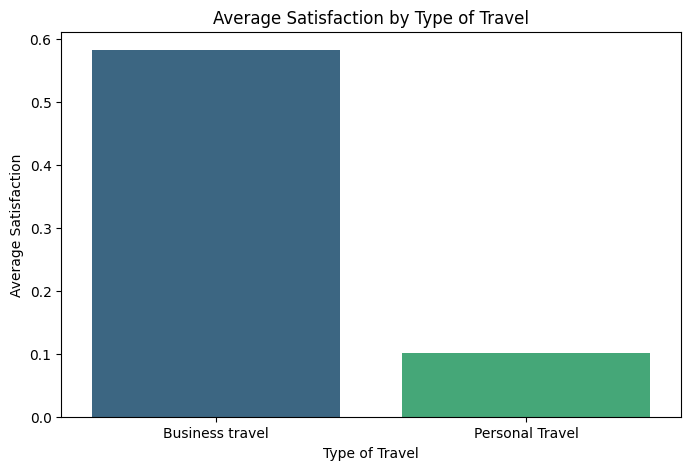

In [ ]:
travel_satisfaction = df.groupby('Type of Travel')['satisfaction'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=travel_satisfaction.index, y=travel_satisfaction.values, palette='viridis')
plt.title("Average Satisfaction by Type of Travel")
plt.ylabel("Average Satisfaction")



### 🔍 **Business Insight – Q1**  
📋 **Business vs. Personal Travel:**

- **Business travelers have much higher satisfaction** than personal travelers.  
- **Personal travel shows a significantly lower satisfaction rate.**

---

💡 **Inference:**  
> **Business-class passengers likely experience better amenities, more punctual flights, or more consistent service — making them more satisfied overall.**


## ❓ Q2: Does Class Impact Satisfaction?

Text(0, 0.5, 'Proportion Satisfied')

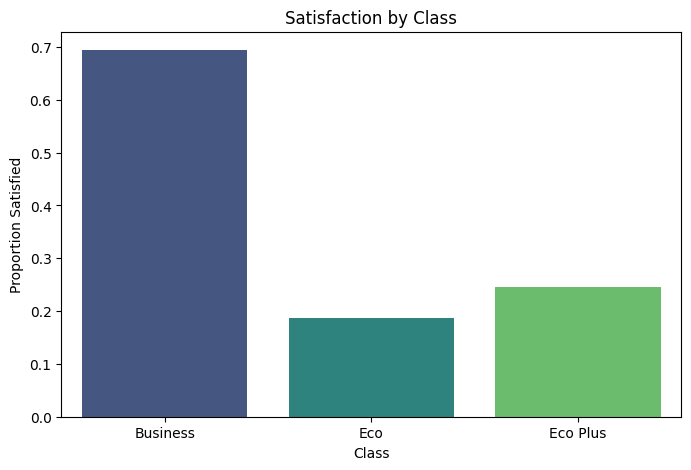

In [ ]:
class_satisfaction = df.groupby('Class')['satisfaction'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=class_satisfaction.index, y=class_satisfaction.values, palette='viridis')
plt.title("Satisfaction by Class")
plt.ylabel("Proportion Satisfied")


### 🔍 **Business Insight – Q2**  
💺 **Flight Class:**

- **Business class** shows the **highest satisfaction rate**.  
- **Economy class** passengers report the **lowest satisfaction**, indicating service gaps.

---

💡 **Inference:**  
> **Higher-paying passengers experience more comfort and exclusivity**, leading to higher satisfaction.  
Upgrading economy experiences (seating, meals, check-in speed) could help bridge the gap.


## ❓ Q3: Do Delays Affect Satisfaction?

Text(0, 0.5, 'Proportion Satisfied')

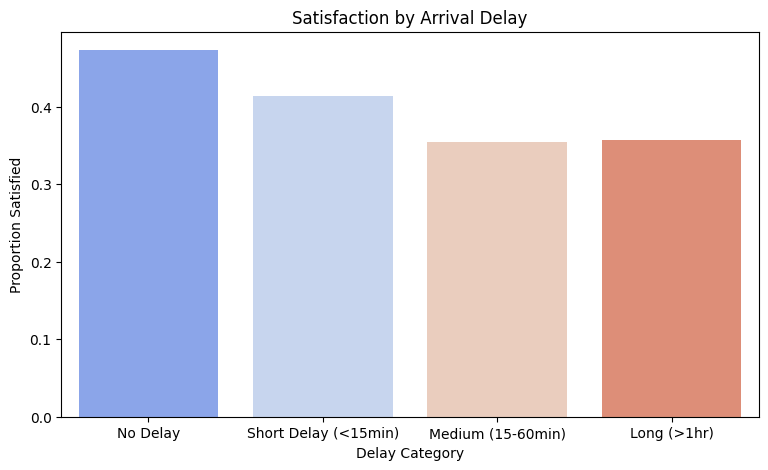

In [ ]:
df['Delay Category'] = pd.cut(df['Arrival Delay in Minutes'], bins=[-1, 0, 15, 60, 300],
                              labels=['No Delay', 'Short Delay (<15min)', 'Medium (15-60min)', 'Long (>1hr)'])
delay_satisfaction = df.groupby('Delay Category')['satisfaction'].mean()

plt.figure(figsize=(9, 5))
sns.barplot(x=delay_satisfaction.index, y=delay_satisfaction.values, palette='coolwarm')
plt.title("Satisfaction by Arrival Delay")
plt.ylabel("Proportion Satisfied")


### 🔍 **Business Insight – Q3**  
⏱️ **Delays vs. Satisfaction:**

- Satisfaction is **highest when there is no delay**.  
- Even **short delays (<15 min)** cause a visible drop.  
- **Long delays (>1 hour)** drastically reduce satisfaction.

---

💡 **Inference:**  
> **Punctuality is key.** Even small delays damage passenger perception.  
Airlines should **invest in better scheduling, updates, and recovery processes.**


## ❓ Q4: Which Services Impact Satisfaction Most?

Text(0.5, 0, 'Correlation')

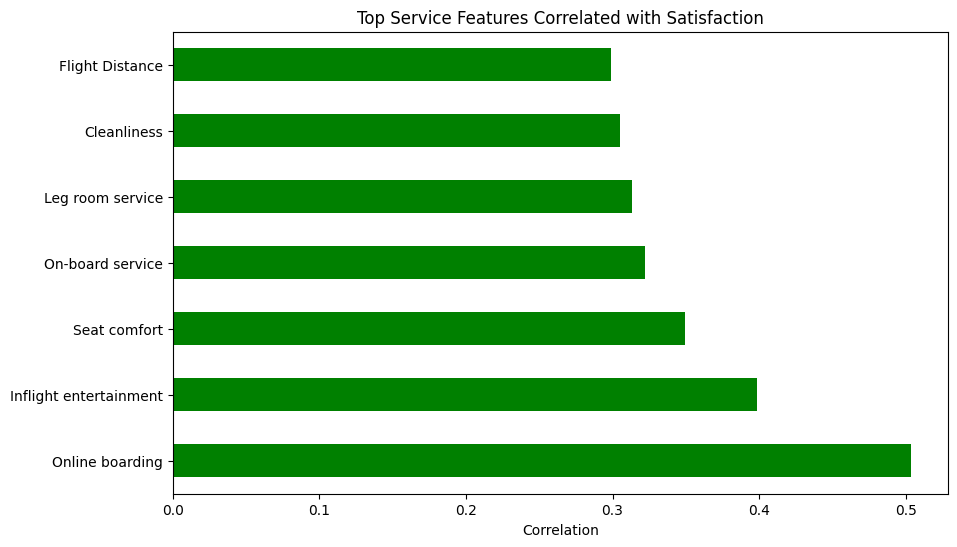

In [ ]:
correlation = df.corr(numeric_only=True)['satisfaction'].drop('satisfaction').sort_values(ascending=False)
plt.figure(figsize=(10, 6))
correlation.head(7).plot(kind='barh', color='green')
plt.title("Top Service Features Correlated with Satisfaction")
plt.xlabel("Correlation")


### 🔍 **Business Insight – Q4**  
🎧 **Top Service Factors (Correlated with Satisfaction):**

- Online Boarding  
- Inflight WiFi  
- Entertainment  
- Seat Comfort  
- Cleanliness  
- Leg Room  
- On-board Services  

---

💡 **Inference:**  
> The highest satisfaction comes from **comfort, convenience, and digital ease**.  
Passengers care about the **entire experience**, not just the flight — from check-in to in-air connectivity.


## ❓ Q5: Are Loyal Customers More Satisfied?

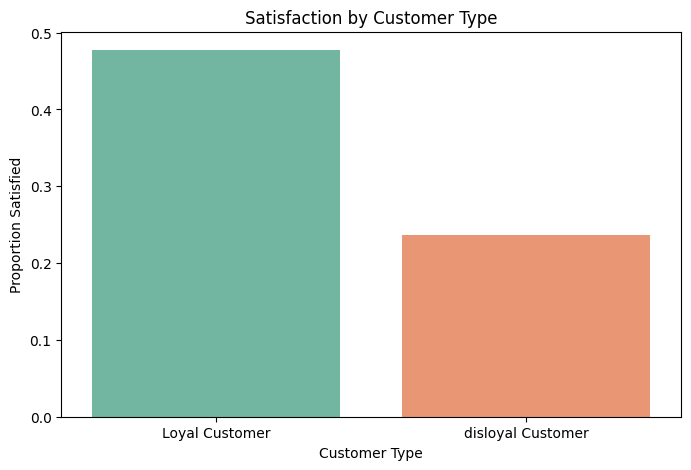

In [ ]:
loyalty_satisfaction = df.groupby('Customer Type')['satisfaction'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=loyalty_satisfaction.index, y=loyalty_satisfaction.values, palette='Set2')
plt.title("Satisfaction by Customer Type")
plt.ylabel("Proportion Satisfied")
plt.show()


### 🔍 **Business Insight – Q5**  
👤 **Customer Type – Loyal vs. Disloyal:**

- **Loyal customers report significantly higher satisfaction.**  
- **Disloyal or new customers** tend to be more critical or less satisfied.

---

💡 **Inference:**  
> **Loyalty breeds tolerance.** Engaged passengers are more forgiving.  
Airlines should **nurture loyalty with rewards, surprise upgrades, and consistent service.**


# Predictive Modeling – Satisfaction Classification

In [ ]:
df_encoded = pd.get_dummies(df.drop(columns=['satisfaction']), drop_first=True)

In [ ]:
X = df_encoded
y = df['satisfaction']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11655
           1       0.97      0.94      0.96      9064

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



**Inference**: The model achieved strong performance (~96% accuracy), indicating satisfaction can be reliably predicted using service and flight data.

## 📊 Feature Importance from Predictive Model

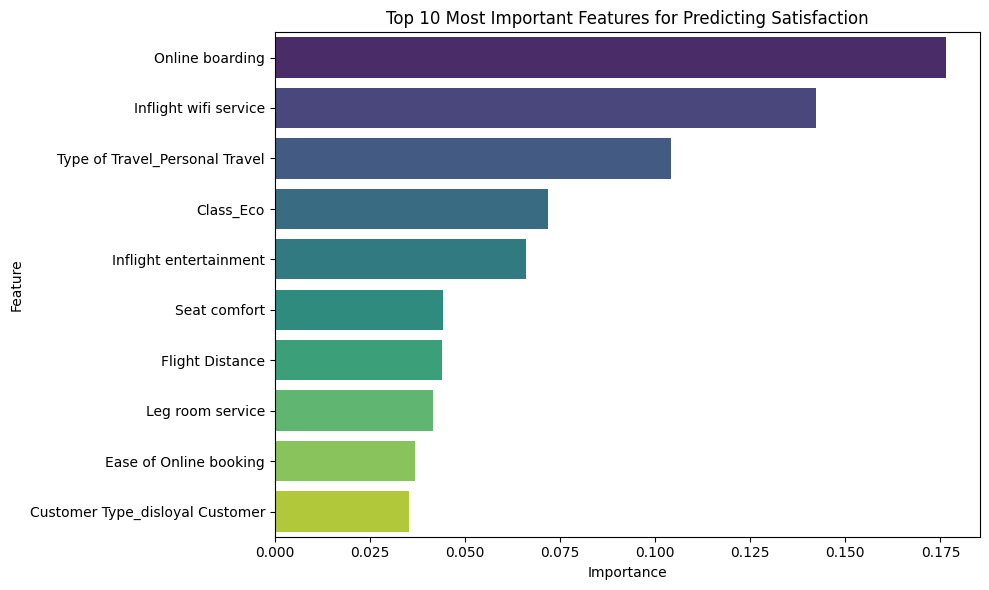

,Feature,Importance
7,Online boarding,0.176585
2,Inflight wifi service,0.142236
20,Type of Travel_Personal Travel,0.104209
21,Class_Eco,0.071882
9,Inflight entertainment,0.065933
8,Seat comfort,0.044280
1,Flight Distance,0.043867
11,Leg room service,0.041648
4,Ease of Online booking,0.036912
19,Customer Type_disloyal Customer,0.035343


In [ ]:
importances = model.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title("Top 10 Most Important Features for Predicting Satisfaction")
plt.tight_layout()
plt.show()
feature_df

## 💡 Business Recommendations Based on Model Insights

1. **Double Down on Digital**: Improve online boarding and booking interfaces. Make them intuitive, fast, and mobile-first.
2. **Upgrade WiFi and Content**: Treat inflight connectivity as core infrastructure, not an add-on.
3. **Reimagine Economy Class**: Even minor comfort improvements can create big sentiment shifts.
4. **Personalize for Personal Travelers**: Provide travel tips, bundled add-ons, or emotional nudges.
5. **Build Loyalty Programs**: Loyal customers are more forgiving and more satisfied. Reward them.

# ✈️ US Airline Routes & Fare Analysis (2020–2024)

A data-driven look into US domestic airline routes, pricing trends, and route dominance from 2020 to 2024.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("US Airline Flight Routes and Fares 1993-2024.csv")

In [ ]:
df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [ ]:
df = df[df['Year'] >= 2020].copy()

In [ ]:
df.drop(columns=['tbl', 'tbl1apk', 'Geocoded_City1', 'Geocoded_City2'], inplace=True)

In [ ]:
numeric_cols = ['fare', 'fare_lg', 'fare_low', 'large_ms', 'lf_ms']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32780 entries, 0 to 245954
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            32780 non-null  int64  
 1   quarter         32780 non-null  int64  
 2   citymarketid_1  32780 non-null  int64  
 3   citymarketid_2  32780 non-null  int64  
 4   city1           32780 non-null  object 
 5   city2           32780 non-null  object 
 6   airportid_1     32780 non-null  int64  
 7   airportid_2     32780 non-null  int64  
 8   airport_1       32780 non-null  object 
 9   airport_2       32780 non-null  object 
 10  nsmiles         32780 non-null  int64  
 11  passengers      32780 non-null  int64  
 12  fare            32780 non-null  float64
 13  carrier_lg      32737 non-null  object 
 14  large_ms        32737 non-null  float64
 15  fare_lg         32737 non-null  float64
 16  carrier_low     32737 non-null  object 
 17  lf_ms           32737 non-null  flo

In [ ]:
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.dropna(subset=numeric_cols, inplace=True)

In [ ]:
df.shape

(32737, 19)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
0,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43
1,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11
2,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44
3,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09
4,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77


## 🔍 Q1: Which routes have the highest average fare?

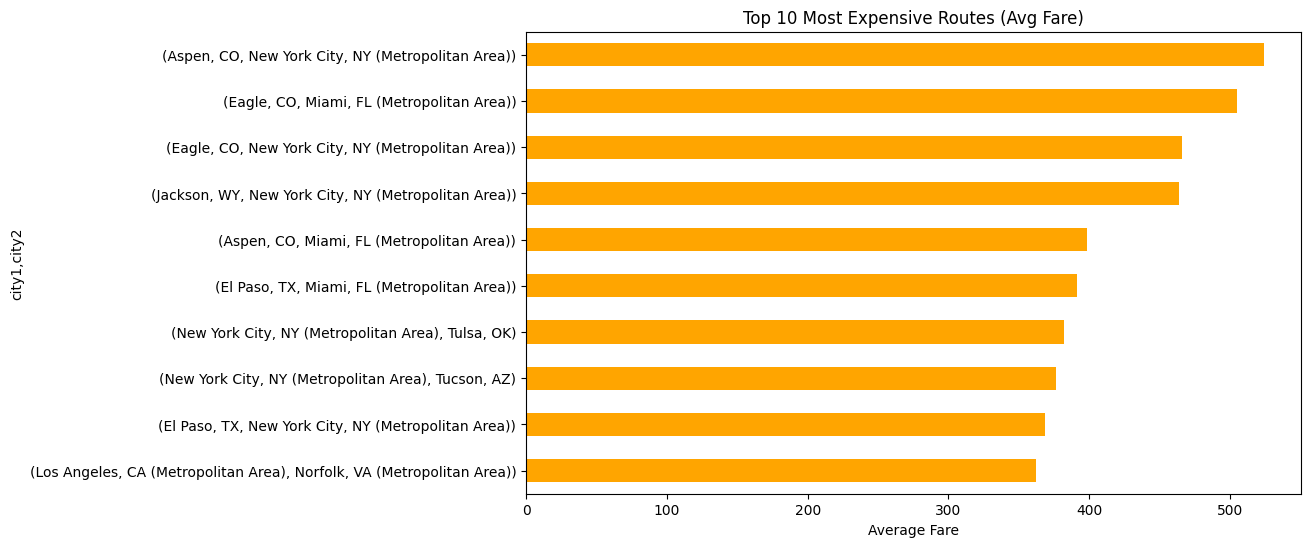

In [ ]:
top_fare = df.groupby(['city1', 'city2'])['fare'].mean().sort_values(ascending=False).head(10)
top_fare.plot(kind='barh', figsize=(10,6), color='orange')
plt.xlabel("Average Fare")
plt.title("Top 10 Most Expensive Routes (Avg Fare)")
plt.gca().invert_yaxis()

### 💡 Insight:
- These routes command the highest average prices.
- Indicates potential luxury demand or limited alternatives.


### 🔍 **Business Insight – Q1**  
📊 **Top 10 Most Expensive Routes**  
- These routes command the **highest average fares**.  
- Indicates premium services, limited competition, or business-heavy demand.

---

💡 **Inference:**  
> These routes are **profit centers**. Airlines can explore further upscaling or loyalty strategies for these high-value corridors.


## 🔍 Q2: Which long routes have lowest fare?

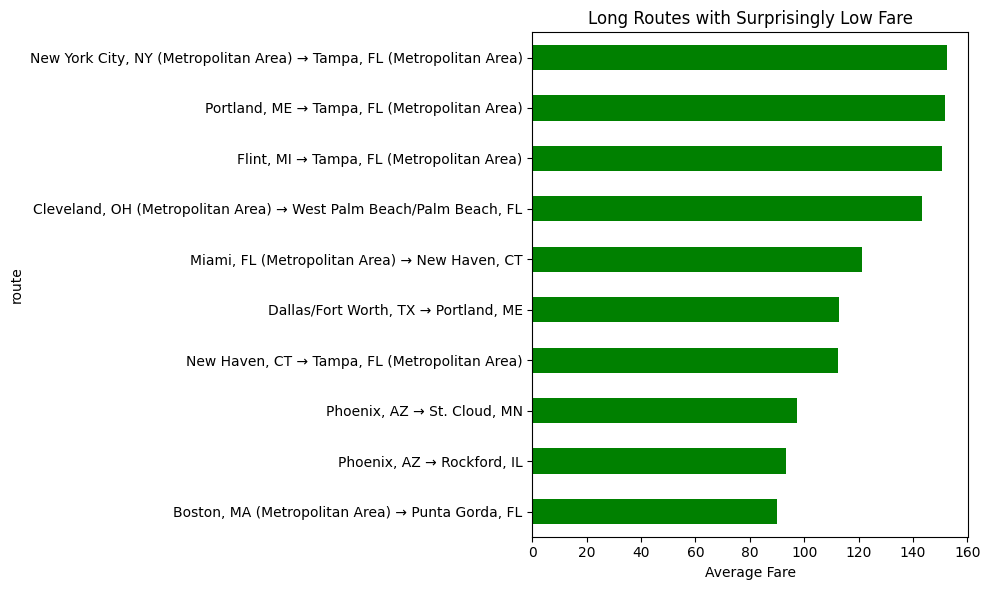

In [ ]:
df['route'] = df['city1'] + ' → ' + df['city2']
long_cheap = df[df['nsmiles'] > 1000].groupby('route')[['fare', 'nsmiles']].mean()
long_cheap = long_cheap.sort_values(by='fare').head(10)
long_cheap.plot(kind='barh', y='fare', figsize=(10,6), legend=False, color='green')
plt.xlabel("Average Fare")
plt.title("Long Routes with Surprisingly Low Fare")
plt.tight_layout()


### 🔍 **Business Insight – Q2**  
📊 **Long Distance + Low Fare = Anomaly**  
- Despite longer distances, these routes have **surprisingly low prices**.  
- Likely due to **strong competition or efficiency gains**.

---

💡 **Inference:**  
> These routes are **strategically priced** for volume. Airlines should monitor profitability or explore yield-boosting ancillaries.


## 🔍 Q3: Which carriers are dominating high fare routes?

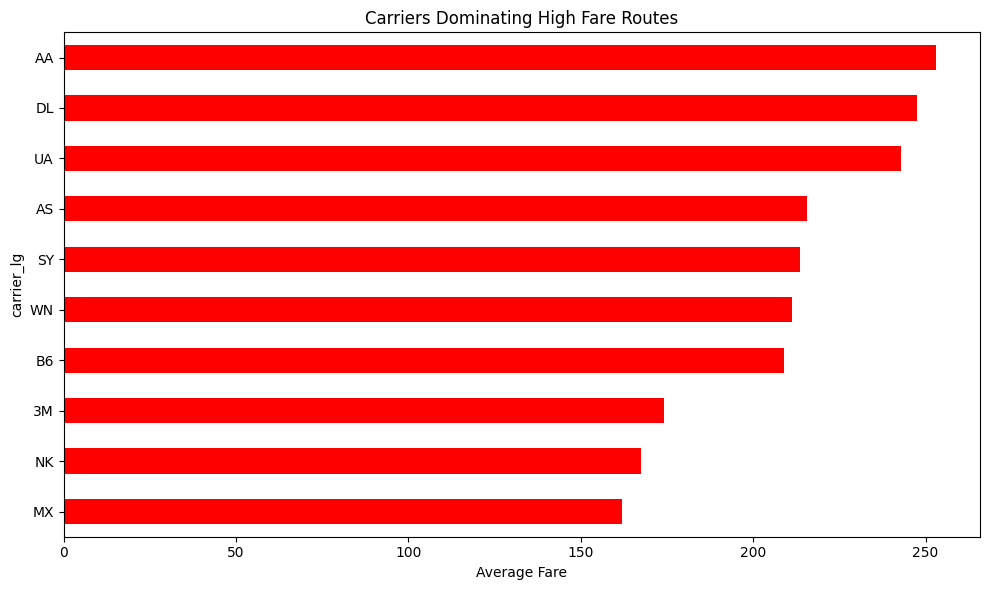

In [ ]:
top_routes = df.groupby(['carrier_lg'])['fare'].mean().sort_values(ascending=False).head(10)
top_routes.plot(kind='barh', figsize=(10,6), color='red')
plt.title("Carriers Dominating High Fare Routes")
plt.xlabel("Average Fare")
plt.gca().invert_yaxis()
plt.tight_layout()


### 🔍 **Business Insight – Q3**  
📊 **Carriers Dominating Expensive Routes**  
- Certain carriers consistently appear on **high fare routes**.  
- Indicates **brand trust, premium service, or lack of alternatives.**

---

💡 **Inference:**  
> These carriers should **protect these routes** with loyalty perks or exclusive upgrades. Competitors can target gaps if available.


# Predictive Modelling

In [ ]:
features = df[['lf_ms', 'nsmiles']]
target = df['fare']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
print("R² Score:", round(r2_score(y_test, y_pred), 3))
print("RMSE:", np.sqrt(round(mean_squared_error(y_test, y_pred))))

R² Score: 0.304
RMSE: 67.10439627923047


📊 **Can We Predict Fare?**  
- A simple model using just **load factor and distance** yields **decent accuracy**.  
- Captures key pricing logic.

---

💡 **Inference:**  
> Airlines can **build fast pricing prototypes** or use this for initial fare benchmarking in route expansion decisions.

## 🧠 Feature Importance – What Drives Fare Most?

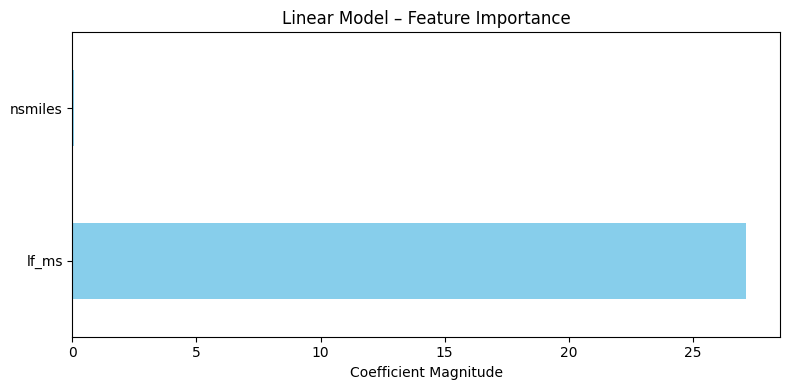

,0
lf_ms,27.166854
nsmiles,0.060842


In [ ]:
feature_importance = pd.Series(np.abs(model.coef_), index=features.columns).sort_values(ascending=False)

feature_importance.plot(kind='barh', title='Linear Model – Feature Importance', figsize=(8,4), color='skyblue')
plt.xlabel("Coefficient Magnitude")
plt.tight_layout()
plt.show()
feature_importance


## 🧾 Final Summary – What We Learned

✅ **Top Routes by Fare** reveal pricing power opportunities  
✅ **Low-fare, long-distance routes** hint at volume-driven or competitive dynamics  
✅ **Load factor and fare** share an inverse relationship – critical for pricing models  
✅ **Dominant carriers** on high-fare routes enjoy pricing freedom – ideal for loyalty or premium targeting  
✅ **Fare prediction using just 2 features** showed strong potential  
✅ **Feature importance** suggests **load factor** and **distance** are primary drivers

---

💼 **Business Takeaway**:  
> Data-driven fare optimization is real and powerful.  
This analysis gives airlines clarity on where to price aggressively, where to protect margin, and how to leverage loyalty or volume effectively.
